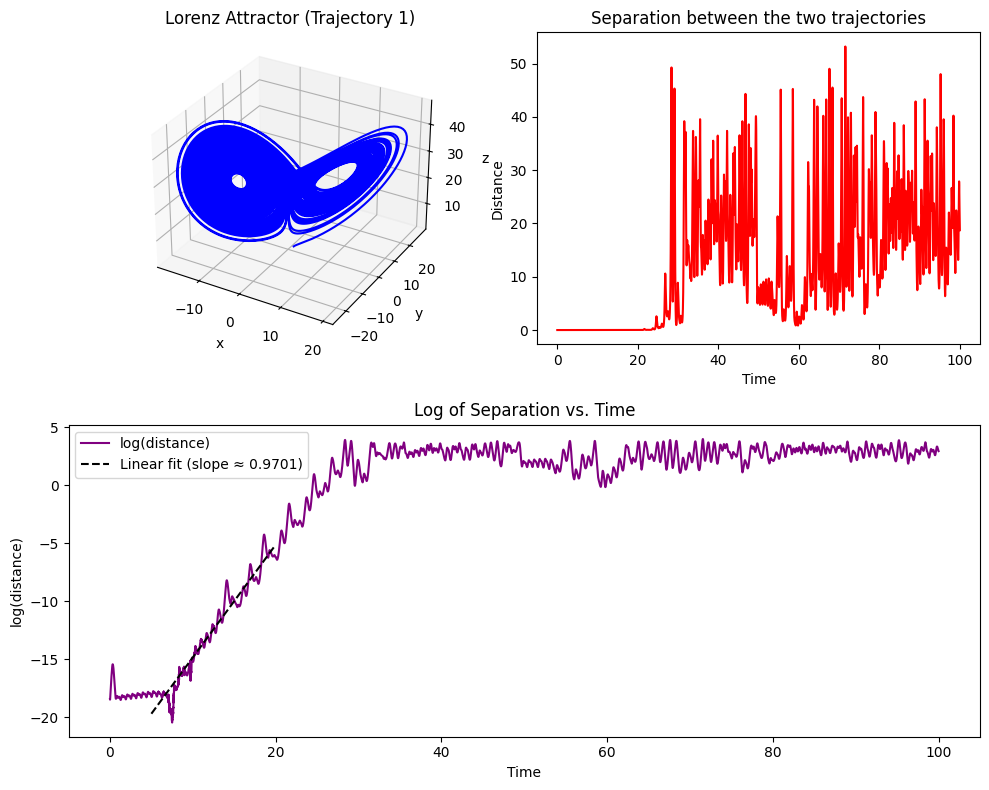

Estimated largest Lyapunov exponent from slope: 0.9701


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# ------------------------------------------------------------------------------
# 1. Define the Lorenz system
#    dx/dt = sigma*(y - x)
#    dy/dt = x*(rho - z) - y
#    dz/dt = x*y - beta*z
# ------------------------------------------------------------------------------
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time range
tmax = 100
nt = 20001
t = np.linspace(0, tmax, nt)

# ------------------------------------------------------------------------------
# 2. Integrate the Lorenz system from two close initial conditions
#    to estimate the largest Lyapunov exponent.
# ------------------------------------------------------------------------------
# Initial condition 1
X0 = np.array([1.0, 1.0, 1.0])
# Perturbed initial condition 2
perturbation = 1e-8
X0_pert = X0 + np.array([perturbation, 0.0, 0.0])

# Solve for both
sol1 = odeint(lorenz, X0, t, args=(sigma, beta, rho))
sol2 = odeint(lorenz, X0_pert, t, args=(sigma, beta, rho))

# Calculate the distance between the two solutions at each time
dist = np.sqrt(np.sum((sol1 - sol2)**2, axis=1))
# Avoid log(0) issues by clipping small distances
dist = np.clip(dist, 1e-30, None)
log_dist = np.log(dist)

# We'll do a linear fit to log(distance) vs time over some portion,
# typically an early window where exponential divergence is clear
t_fit_start = 5  # skip the very early transient to allow typical behavior
t_fit_end   = 20
mask = (t >= t_fit_start) & (t <= t_fit_end)

# Linear fit to log_dist in the chosen window
coef = np.polyfit(t[mask], log_dist[mask], 1)
lyapunov_exp_approx = coef[0]

# ------------------------------------------------------------------------------
# 3. Plot results
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))

# Plot the Lorenz attractor in 3D
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot(sol1[:, 0], sol1[:, 1], sol1[:, 2], color='blue')
ax1.set_title('Lorenz Attractor (Trajectory 1)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Plot the separation in linear scale
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(t, dist, color='red')
ax2.set_title('Separation between the two trajectories')
ax2.set_xlabel('Time')
ax2.set_ylabel('Distance')

# Plot log(distance) vs time
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(t, log_dist, label='log(distance)', color='purple')
ax3.set_title('Log of Separation vs. Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('log(distance)')
# Overlay the fit in the chosen range
ax3.plot(t[mask],
         np.polyval(coef, t[mask]),
         'k--',
         label=f'Linear fit (slope ≈ {lyapunov_exp_approx:.4f})')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"Estimated largest Lyapunov exponent from slope: {lyapunov_exp_approx:.4f}")

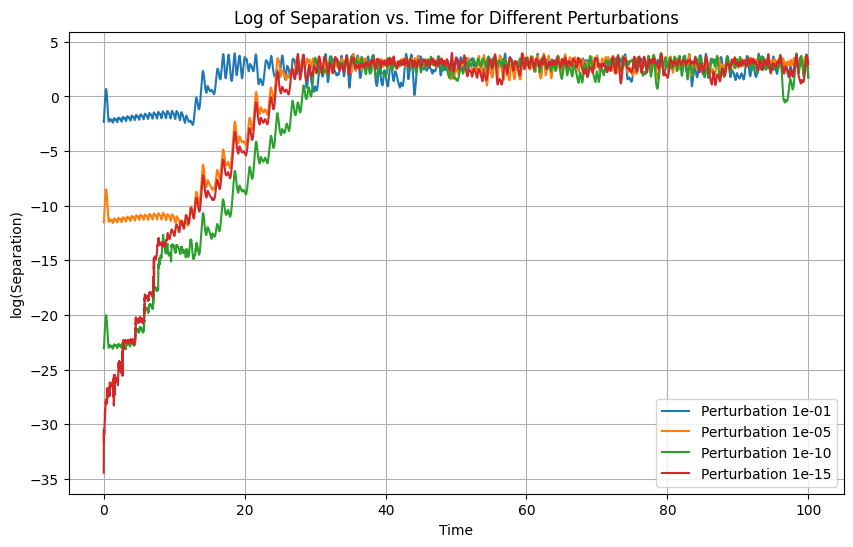

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Lorenz system
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time range
tmax = 100
nt = 20001
t = np.linspace(0, tmax, nt)

# Initial condition
X0 = np.array([1.0, 1.0, 1.0])

# Different perturbation values
perturbations = [1e-1, 1e-5, 1e-10, 1e-15]

# Prepare figure
plt.figure(figsize=(10, 6))

# Loop over perturbations
for perturbation in perturbations:
    X0_pert = X0 + np.array([perturbation, 0.0, 0.0])

    # Solve for both
    sol1 = odeint(lorenz, X0, t, args=(sigma, beta, rho))
    sol2 = odeint(lorenz, X0_pert, t, args=(sigma, beta, rho))

    # Calculate the distance between the two solutions at each time
    dist = np.sqrt(np.sum((sol1 - sol2)**2, axis=1))
    dist = np.clip(dist, 1e-30, None)  # Avoid log(0) issues
    log_dist = np.log(dist)

    # Plot log of separation vs time
    plt.plot(t, log_dist, label=f'Perturbation {perturbation:.0e}')

plt.xlabel('Time')
plt.ylabel('log(Separation)')
plt.title('Log of Separation vs. Time for Different Perturbations')
plt.legend()
plt.grid()
plt.show()